 # Caso 3: Estimacion de Tiempo de Entrega

Descripción: Se enfoca en estimar el tiempo de entrega de los pedidos.

Datasets utilizado: olist_order_items_dataset.csv y olist_orders_dataset.csv.

# 1 Cargar y Preprocesar Datos

- Importacion de Librerias Necesarias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

- Cargar y Preprocesar Datos

In [3]:
# Cargar datasets
order_items = pd.read_csv('../datos/olist_order_items_dataset.csv')
orders = pd.read_csv('../datos/olist_orders_dataset.csv')

- Union de los dataset

In [4]:
# Unir los datasets según sea necesario
data = pd.merge(order_items, orders, on='order_id')

- Conversión de fechas a formato datetime.

In [5]:
# Convertir fechas a formato datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])

- Creación de una columna para el tiempo de entrega en días.

In [6]:
# Crear una columna de tiempo de entrega en días
data['delivery_time_days'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days
print(data)

                                order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242a

- Conversión de product_id a una representación numérica.

In [7]:
#Convertir product_id a una representación numérica
data['product_id'] = data['product_id'].astype('category').cat.codes

In [8]:
# Crear nuevas características relevantes
data['purchase_year'] = data['order_purchase_timestamp'].dt.year
data['purchase_month'] = data['order_purchase_timestamp'].dt.month
data['delivery_weekday'] = data['order_delivered_customer_date'].dt.weekday

In [9]:
# Definir las características (X) y la etiqueta (y)
X = data[['purchase_year', 'purchase_month', 'delivery_weekday', 'product_id']]
y = data['delivery_time_days']

In [10]:
# Mostrar la estructura de los datos
print(data.head())


                           order_id  order_item_id  product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1        8628   
1  00018f77f2f0320c557190d7a144bdd3              1       29597   
2  000229ec398224ef6ca0657da4fc703e              1       25667   
3  00024acbcdf0a6daa1e931b038114c75              1       15322   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1       22079   

                          seller_id  shipping_limit_date   price  \
0  48436dade18ac8b2bce089ec2a041202  2017-09-19 09:45:35   58.90   
1  dd7ddc04e1b6c2c614352b383efe2d36  2017-05-03 11:05:13  239.90   
2  5b51032eddd242adc84c38acab88f23d  2018-01-18 14:48:30  199.00   
3  9d7a1d34a5052409006425275ba1c2b4  2018-08-15 10:10:18   12.99   
4  df560393f3a51e74553ab94004ba5c87  2017-02-13 13:57:51  199.90   

   freight_value                       customer_id order_status  \
0          13.29  3ce436f183e68e07877b285a838db11a    delivered   
1          19.93  f6dd3ec061db4e3987629fe6b26e5cce    delive

# 2 Análisis Exploratorio de Datos (EDA)

- Visualización de la distribución del tiempo de entrega en días utilizando un histograma.

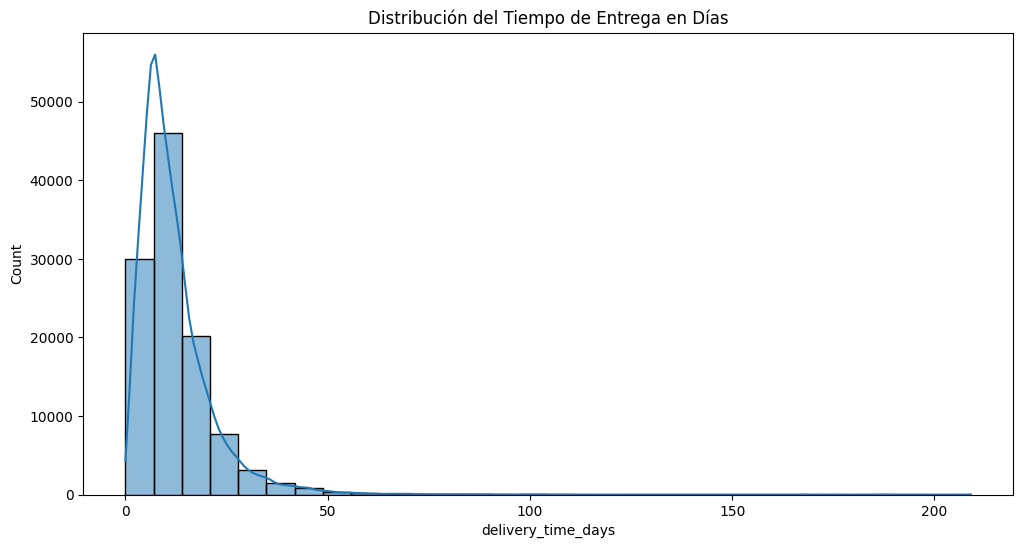

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Exploratorio de Datos
plt.figure(figsize=(12, 6))
sns.histplot(data['delivery_time_days'], bins=30, kde=True)
plt.title('Distribución del Tiempo de Entrega en Días')
plt.show()

# 3 Ingenieria de caracteristicas

- Creación de nuevas características relevantes: año de compra, mes de compra y día de la semana de entrega.

In [12]:
# Crear nuevas características relevantes
data['purchase_year'] = data['order_purchase_timestamp'].dt.year
data['purchase_month'] = data['order_purchase_timestamp'].dt.month
data['delivery_weekday'] = data['order_delivered_customer_date'].dt.weekday

# 4 Entrenamiento de Modelos

-  Modelo Gradient Boosting Regressor

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Verificar si hay valores nulos
print(data.isnull().sum())

# Eliminar filas con valores nulos
data = data.dropna()

# Agregar más características relevantes
data['freight_value'] = data['freight_value']
data['price'] = data['price']
data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date'])
data['shipping_limit_day'] = data['shipping_limit_date'].dt.weekday

# Definir las características (X) y la etiqueta (y)
X = data[['purchase_year', 'purchase_month', 'delivery_weekday', 'product_id', 'freight_value', 'price', 'shipping_limit_day']]
y = data['delivery_time_days']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el modelo
model = GradientBoostingRegressor()

# Definir los hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Realizar predicciones y evaluar el modelo
y_pred = best_model.predict(X_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f} días')

# Evaluar el modelo utilizando validación cruzada
scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Mean Absolute Error (cross-validation): {-scores.mean():.2f} días')

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
delivery_time_days               2454
purchase_year                       0
purchase_month                      0
delivery_weekday                 2454
dtype: int64
Mean Absolute Error: 5.17 días


-  Evaluacion y Visualizacion

- Visualización de la predicción vs realidad de los tiempos de entrega utilizando un gráfico de dispersión.

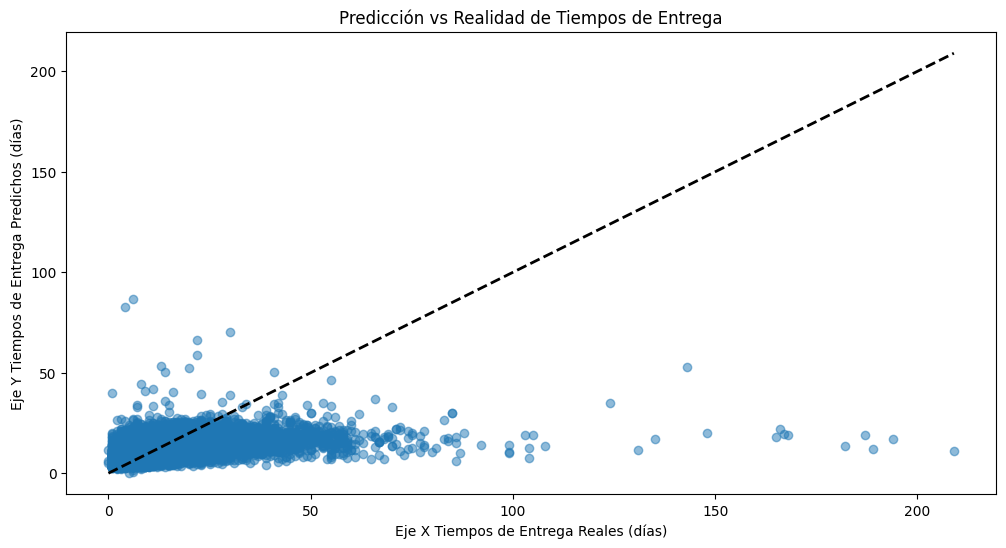

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicción vs Realidad de Tiempos de Entrega')
plt.xlabel('Eje X Tiempos de Entrega Reales (días)')
plt.ylabel('Eje Y Tiempos de Entrega Predichos (días)')
plt.show()



Eje X (horizontal): Tiempos de Entrega Reales (días). Este eje representa el número de días que realmente tomó entregar un producto o servicio.

Eje Y (vertical): Tiempos de Entrega Predichos (días). Este eje representa el número de días que se estimó que tomaría la entrega.

- Interpretación del Gráfico:

- Este gráfico te permite visualizar qué tan bien el modelo de predicción está funcionando.
- Si los puntos están mayormente cerca de la línea diagonal, el modelo está haciendo buenas predicciones.
- Si los puntos están dispersos lejos de la línea diagonal, el modelo necesita ser mejorado.
- En este caso concreto, se puede apreciar que la mayor concentración de puntos, se encuentra en la parte inferior izquierda del gráfico, lo que indica que para los tiempos de entrega más cortos, la predicción es más precisa. También se puede apreciar que a medida que los tiempos de entrega aumentan, la predicción pierde precisión.

# Conclusion


El objetivo de este análisis fue estimar el tiempo de entrega de los pedidos utilizando un modelo de regresión basado en Gradient Boosting.

El modelo de Gradient Boosting Regressor utilizado en este caso permitió predecir los tiempos de entrega con una precisión razonable. Los gráficos utilizados ayudaron a entender mejor la distribución de los tiempos de entrega y a evaluar la precisión del modelo. Aunque el modelo funcionó bien, siempre hay margen para mejorar y se podrían probar otros enfoques para aumentar la precisión..